In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today().strftime('%Y-%m-%d')

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994
2022-04-14,171.270004,165.039993,170.619995,165.289993,75237500.0,165.289993


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


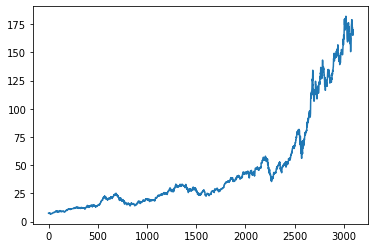

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3089,171.779999,169.199997,171.779999,170.089996,76515900.0
3090,169.029999,165.500000,168.710007,165.750000,72246700.0
3091,169.869995,166.639999,168.020004,167.660004,79265200.0
3092,171.039993,166.770004,167.389999,170.399994,70618900.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3089    168.7580
3090    168.9055
3091    169.0472
3092    169.1725
3093    169.2199
Name: Close, Length: 3094, dtype: float64

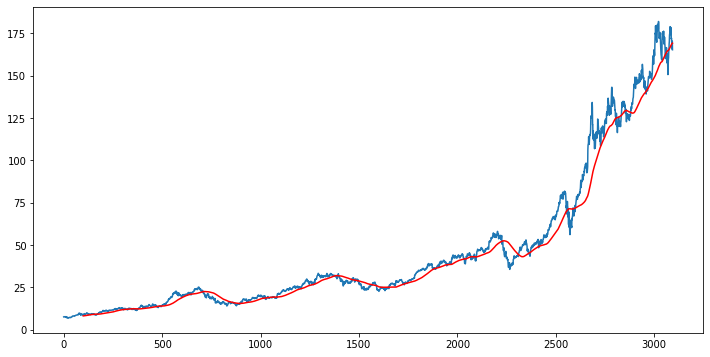

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3089    157.72915
3090    157.89235
3091    158.05675
3092    158.22710
3093    158.36875
Name: Close, Length: 3094, dtype: float64

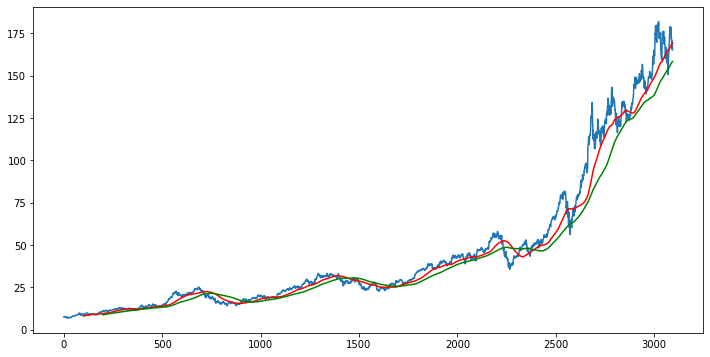

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3094, 5)

In [13]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2165, 1)
(929, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2165,51.812500
2166,52.220001
2167,51.882500
2168,52.217499
2169,52.437500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01469198],
       [0.01727174],
       [0.01756276],
       ...,
       [0.99405398],
       [1.        ],
       [0.98920905]])

In [18]:
data_training_array.shape

(2165, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2065, 100, 1)

In [21]:
#ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 20, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                8

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
65/65 [==============================] - 9s 89ms/step - loss: 0.0468
Epoch 2/50
65/65 [==============================] - 6s 87ms/step - loss: 0.0213
Epoch 3/50
65/65 [==============================] - 9s 141ms/step - loss: 0.0178
Epoch 4/50
65/65 [==============================] - 9s 138ms/step - loss: 0.0159
Epoch 5/50
65/65 [==============================] - 9s 137ms/step - loss: 0.0153
Epoch 6/50
65/65 [==============================] - 9s 141ms/step - loss: 0.0131
Epoch 7/50
65/65 [==============================] - 8s 130ms/step - loss: 0.0129
Epoch 8/50
65/65 [==============================] - 8s 127ms/step - loss: 0.0111
Epoch 9/50
65/65 [==============================] - 8s 124ms/step - loss: 0.0091
Epoch 10/50
65/65 [==============================] - 8s 122ms/step - loss: 0.0091
Epoch 11/50
65/65 [==============================] - 7s 114ms/step - loss: 0.0080
Epoch 12/50
65/65 [==============================] - 9s 134ms/step - loss: 0.0074
Epoch 13/50
65/65 [========

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
2165,51.812500
2166,52.220001
2167,51.882500
2168,52.217499
2169,52.437500


In [28]:
data_training.tail(100)

,Close
2065,44.505001
2066,43.825001
2067,43.810001
2068,42.817501
2069,42.212502
...,...
2160,50.375000
2161,51.847500
2162,51.997501
2163,52.267502


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\Sushanth\AppData\Local\Temp\ipykernel_19104\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [31]:
final_df.head()

,Close
0,44.505001
1,43.825001
2,43.810001
3,42.817501
4,42.212502


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.06115901],
       [0.05651618],
       [0.05641377],
       ...,
       [0.90202276],
       [0.92073055],
       [0.88584107]])

In [33]:
input_data.shape

(1029, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(929, 100, 1)
(929,)


In [36]:
# Making Predictions
y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(929, 1)

In [38]:
y_test

array([0.11105232, 0.11383461, 0.11153025, 0.11381752, 0.11531962,
       0.11615602, 0.12141334, 0.12868482, 0.12506616, 0.12434923,
       0.12436631, 0.12511736, 0.126261  , 0.12929931, 0.13230349,
       0.13790219, 0.14140138, 0.14583939, 0.14708543, 0.14454211,
       0.13810704, 0.13503457, 0.12996501, 0.13938723, 0.13464199,
       0.14375694, 0.13937014, 0.1291969 , 0.1298114 , 0.13003328,
       0.13286677, 0.12882138, 0.13416403, 0.13655373, 0.13353247,
       0.14126483, 0.14261331, 0.14520781, 0.1486558 , 0.15341813,
       0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443458,
       0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904

In [39]:
y_predicted

array([[0.11698431],
       [0.11807731],
       [0.11933506],
       [0.12072411],
       [0.12220365],
       [0.12373748],
       [0.12529391],
       [0.1268543 ],
       [0.1284239 ],
       [0.13000917],
       [0.13160238],
       [0.13318819],
       [0.13474864],
       [0.13626775],
       [0.13773769],
       [0.13916183],
       [0.14055833],
       [0.14195566],
       [0.14338706],
       [0.14488032],
       [0.14644241],
       [0.14804612],
       [0.14963889],
       [0.15115225],
       [0.15254359],
       [0.15378597],
       [0.15488255],
       [0.15584703],
       [0.15666577],
       [0.15731774],
       [0.15779188],
       [0.15809548],
       [0.15823916],
       [0.15824899],
       [0.15816751],
       [0.15803045],
       [0.15788352],
       [0.15777594],
       [0.15775137],
       [0.15784886],
       [0.1581052 ],
       [0.1585258 ],
       [0.15907407],
       [0.15969408],
       [0.16034329],
       [0.16094735],
       [0.16141528],
       [0.161

In [40]:
scaler.scale_

array([0.00682769])

In [41]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

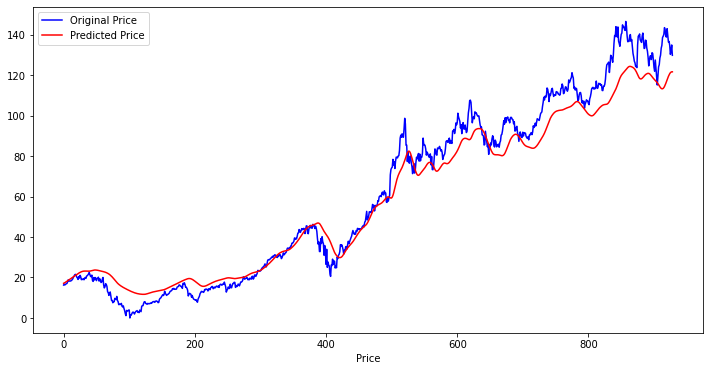

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()